### 4. Rips and folds - setup

In their study, Warren et al. found a reversal of targets close to the wormhole compared to their ground truth ordering.

Here, the experiment is simply used as an extra dataset for evaluation.

In [1]:
# Graph creation based on pixel position

import numpy as np
import networkx as nx 

# Pixel positions in "warren ground truth positions.png"
image_points = np.array([
    [133,909],[57,909],[61,779],[377,777],[403,669],
    [517,667],[553,511],[559,309],[663,245],[663,59],
    [785,59],[787,119],[53,59],[305,319],[185,313],
    [403,961],[183,1143],[100,1081],[481,1137],[579,1117],
    [705,521],[911,341],[1049,345],[1025,543],[1041,751],
    [919,931],[709,919],[653,723],[733,625],[879,637],
    [871,755],[1017,213],[1019,63],[897,61],[897,99],
    [1165,61],[1165,1165],[1005,1167],[861,1065],[847,1165],
    [781,1163],[595,607]
    ])

n = image_points.shape[0]

gt = image_points.astype(float)

offset = gt[0]
refLength = np.linalg.norm(gt[1]-gt[0])
gt = (gt-offset)/refLength*[1,-1] # Image coordinate to euclidean xy correction

# for exact measurements of wormhole1's entrance
wh1_entrances = np.array([[61,559],[557,57]],float)
wh1_entrances = (wh1_entrances-offset)/refLength*[1,-1] 

# 2 versions: Gn - no wormhole | Gw - wormhole
Gn = nx.Graph()
Gw = nx.Graph()
Gn.add_nodes_from(range(n))
Gw.add_nodes_from(range(n))

Gn.add_edges_from([
    (0,1),(1,2),(2,3),(3,4),(3,15),(4,5),(4,13),(5,41),(6,7),(6,41),
    (7,8),(8,9),(9,10),(10,11),(13,14),(15,16),(15,18),(16,17),(18,19),
    (20,21),(20,41),(21,22),(21,31),(22,23),(23,24),(24,25),(25,26),(25,38),
    (26,27),(27,41),(28,29),(28,41),(29,30),(31,32),(32,33),(33,34),(37,38),(38,39),
    (39,40),
    (2,12),(9,12),(32,35),(35,36),(36,37)    # WH-related edges
    ])

Gw.add_edges_from([
    (0,1),(1,2),(2,3),(3,4),(3,15),(4,5),(4,13),(5,41),(6,7),(6,41),
    (7,8),(8,9),(9,10),(10,11),(13,14),(15,16),(15,18),(16,17),(18,19),
    (20,21),(20,41),(21,22),(21,31),(22,23),(23,24),(24,25),(25,26),(25,38),
    (26,27),(27,41),(28,29),(28,41),(29,30),(31,32),(32,33),(33,34),(37,38),(38,39),
    (39,40),
    (2,9),(32,36),(36,37)  # WH-related edges
    ])


# exact distances
D = np.zeros((n,n))
for u,v in Gn.edges:
    D[u,v]=np.linalg.norm(gt[u]-gt[v])
    D[v,u]=np.linalg.norm(gt[u]-gt[v])
D[2,9] = D[9,2] = np.linalg.norm(gt[2]-wh1_entrances[0])\
    +np.linalg.norm(gt[9]-wh1_entrances[1])
D[32,36] = D[36,32] = D[32,35]

#triplets, exact angles
Tn = []
Tw = []
A = np.zeros((n, n, n),float)
for i in range(n):
    for j in range(n):
        for k in range(n):
            if Gn.has_edge(i,j) and Gn.has_edge(j,k):
                Tn.append([i,j,k])
                A[i,j,k] = np.math.atan2(np.linalg.det([gt[j]-gt[i], gt[j]-gt[k]]),
                    np.dot(gt[j]-gt[i], gt[j]-gt[k]))
            if Gw.has_edge(i,j) and Gw.has_edge(j,k):
                Tw.append([i,j,k])
Tn = np.asarray(Tn)
Tw = np.asarray(Tw)

# Wormhole angle changes
A[1,2,9] = A[1,2,12]
A[9,2,1] = A[12,2,1]
A[3,2,9] = A[3,2,12]
A[9,2,3] = A[12,2,3]
A[2,9,8] = A[12,9,8]
A[8,9,2] = A[8,9,12]
A[2,9,10] = A[12,9,10]
A[10,9,2] = A[10,9,12]

A[31,32,36] = A[31,32,35]
A[36,32,31] = A[35,32,31]
A[32,36,37] = A[35,36,37]
A[37,36,32] = A[37,36,35]
A[33,32,36] = A[33,32,35]
A[36,32,33] = A[35,32,33]

Gw.remove_node(12)
Gw.remove_node(35)

# Object positions
O = {
    "bookcase":0,
    "cactus":11,
    "clock":14,
    "earth":17,
    "flamingo":19,
    "gear":23,
    "moon":30,
    "well":34,
    "sink":40
}

Gnwh = Gn.copy()
Gnwh.remove_node(12)
Gnwh.remove_node(35)

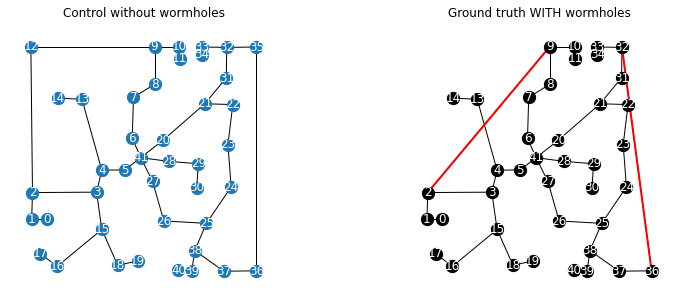

In [3]:
# [RUN TWICE for large plots!] The graphs with ther nodes at the respective pixel
# positions (gt)

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 5]

ax = plt.subplot(121, aspect='equal')
nx.draw(Gn, with_labels=True, node_size=150, pos=gt, font_color='w')
ax.set_title("Control without wormholes")

ax = plt.subplot(122, aspect='equal')
plt.plot([gt[2][0], gt[9][0]], [gt[2][1], gt[9][1]], color='r', linewidth=2)
plt.plot([gt[32][0], gt[36][0]], [gt[32][1],
         gt[36][1]], color='r', linewidth=2)
nx.draw(Gw, with_labels=True, node_size=150,
        pos=gt, node_color='k', font_color='w')
ax.set_title("Ground truth WITH wormholes")

plt.show()


Embedding 1 - Iterations: 154, stress: 450.6799883152159
Embedding 2 - Iterations: 132, stress: 367.3553392574788


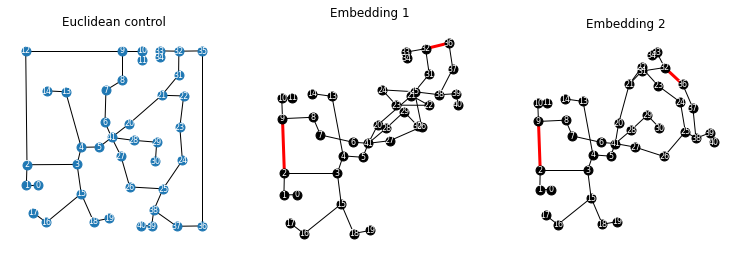

In [4]:
# Find lowest stress embedding based on random starting seeds
# via numerical approximation (quasi-newton methods)

# There seem to exists two local minima (in 1000 random restarts)
# E.g., seed 3773 and 3774

import scipy.optimize
import function_repository4 as fr4

# Node 0 is constrained to (0,0)
cons = ({'type': 'eq', 'fun': lambda x: x[0]},
        {'type': 'eq', 'fun': lambda x: x[1]})

np.random.seed(3773)
x0 = np.random.uniform(size=(n, 2))
sl1 = scipy.optimize.minimize(fr4.fast_stress, x0.flatten(), (1, 1, D, A, Tw),
                              method='SLSQP', constraints=cons, options={'maxiter': 500})
print("Embedding 1 - Iterations: {}, stress: {}".format(sl1.nit, sl1.fun))
em1 = sl1.x.reshape(n, 2)

np.random.seed(3774)
x0 = np.random.uniform(size=(n, 2))
sl2 = scipy.optimize.minimize(fr4.fast_stress, x0.flatten(), (1, 1, D, A, Tw),
                              method='SLSQP', constraints=cons, options={'maxiter': 500})
print("Embedding 2 - Iterations: {}, stress: {}".format(sl2.nit, sl2.fun))
em2 = sl2.x.reshape(n, 2)

# Rotate embeddings so that edge e(2,3) faces to the east/in x-direction
r1 = fr4.angle(em1[2], em1[3])
em1 = em1@np.array([[np.cos(r1), -np.sin(r1)], [np.sin(r1), np.cos(r1)]])

r2 = fr4.angle(em2[2], em2[3])
em2 = em2@np.array([[np.cos(r2), -np.sin(r2)], [np.sin(r2), np.cos(r2)]])

ax = plt.subplot(131, aspect='equal')
nx.draw(Gn, with_labels=True, node_size=80, pos=gt, font_size=8, font_color='w')
ax.set_title("Euclidean control")

ax = plt.subplot(132, aspect='equal')
plt.plot([em1[2][0], em1[9][0]], [em1[2][1],
         em1[9][1]], color='r', linewidth=3)
plt.plot([em1[32][0], em1[36][0]], [em1[32][1],
         em1[36][1]], color='r', linewidth=3)
nx.draw(Gw, with_labels=True, node_size=80, pos=em1, node_color='k', font_size=8,
        font_color='w')
ax.set_title("Embedding 1")

ax = plt.subplot(133, aspect='equal')
plt.plot([em2[2][0], em2[9][0]], [em2[2][1],
         em2[9][1]], color='r', linewidth=3)
plt.plot([em2[32][0], em2[36][0]], [em2[32][1],
         em2[36][1]], color='r', linewidth=3)
nx.draw(Gw, with_labels=True, node_size=80, pos=em2, node_color='k', font_size=8,
        font_color='w')
ax.set_title("Embedding 2")
plt.show()


In [7]:
# Error and helper functions

def UVDistanceError(m, vec):
    """
    Squared distance between unit vectors of measurement m and vec
    Vec should be either the vector addition in ground truth coordinates or the direct
    connection in the embeddings
    """
    u = np.array([np.cos(m[2]), np.sin(m[2])])
    v = vec/np.linalg.norm(vec)
    return np.linalg.norm(u-v)**2


def angularError(m, vec, ed=1):
    """
    Probably the Error function used in Warren 2017.
    ed = 1/-1 is the direction in which the error increases, as in Warren2017
    """
    a = m[2]
    b = np.arctan2(vec[1], vec[0])
    smaller_angle = (a-b+np.pi) % (2*np.pi)-np.pi
    return ed*smaller_angle


def dataPerSubject(data, headers, s):
    """Brings data in the form [o1, o2, angle]. Three rows correspond to one R&F."""
    dataPS = []
    for i in range(headers.shape[1]):
        start = headers[0, int(i/3)*3]
        target = headers[1, i]
        value = data[s, i]
        dataPS.append([start, target, value])

    # actual angles relative to 0°
    for d in dataPS:
        d[2] = np.deg2rad(d[2])+fr4.angle(gt[d[0]], gt[d[1]])

    return dataPS


def plotRip(data, pos, num):
    """
    Plots gbr-colored measurement-vector triple of data at entry num
    Uses the wormhole graph for the first vector but the regular graph for
    the other two (so that the shortest paths don't go through WHs)
    """
    d = data[num]
    v = fr4.vectorAlongPath(nx.dijkstra_path(Gw, d[0], d[1]), pos, D, A)
    fr4.plotVectorAndMeasurement(v, d, pos, 'g', 3)
    d = data[num+1]
    v = fr4.vectorAlongPath(nx.dijkstra_path(Gnwh, d[0], d[1]), pos, D, A)
    fr4.plotVectorAndMeasurement(v, d, pos, 'b', 3)
    d = data[num+2]
    v = fr4.vectorAlongPath(nx.dijkstra_path(Gnwh, d[0], d[1]), pos, D, A)
    fr4.plotVectorAndMeasurement(v, d, pos, 'r', 3)


In [8]:
# Create a dataset over all subjects (n=11, 24 tests in 3 envs. each -> 11x72 table)

# correction for clockwise angles in the dataset
# (angles are given relative to the target position and not in anti-clockwise order)
leftRightIncrease = [1, 1, -1,   -1, -1, -1,   1, 1, 1,   -1, -1, -1, 
                     1, 1, -1,   -1, -1, -1,   1, 1, 1,   -1, -1, -1]

# import data and object pairs (headers) from file
data = np.loadtxt("datasets/data_rips.txt",delimiter='\t',skiprows=2,dtype=float)
headers = np.genfromtxt("datasets/data_rips_headers.txt", delimiter="\t",dtype=int)

# correction for mirrored angles due to warren dataset
data[:,2:6]*=-1 
data[:,9:12]*=-1
data[:,14:18]*=-1
data[:,21:]*=-1


dataset_ue = []
dataset_ae = []

for s in range(len(data)):
    data_sub = dataPerSubject(data, headers, s)
    est_local1 = fr4.makeLocal(Gw, gt, em1, data_sub)
    est_local2 = fr4.makeLocal(Gw, gt, em2, data_sub)

    ue_vectorAddition = []
    ae_vectorAddition = []
    for ed, m in zip(leftRightIncrease, data_sub):
        v = fr4.vectorAlongPath(nx.dijkstra_path(Gw, m[0], m[1]), gt, D, A)
        ue_vectorAddition.append(UVDistanceError(m, v))
        ae_vectorAddition.append(angularError(m, v, ed))

    ue_em1 = []
    ae_em1 = []
    for ed, m in zip(leftRightIncrease, est_local1):
        v = em1[m[1]]-em1[m[0]]
        ue_em1.append(UVDistanceError(m, v))
        ae_em1.append(angularError(m, v, ed))

    ue_em2 = []
    ae_em2 = []
    for ed, m in zip(leftRightIncrease, est_local2):
        v = em2[m[1]]-em2[m[0]]
        ue_em2.append(UVDistanceError(m, v))
        ae_em2.append(angularError(m, v, ed))

    dataset_ue.append(ue_vectorAddition+ue_em1+ue_em2)
    dataset_ae.append(ae_vectorAddition+ae_em1+ae_em2)

dataset_ue = np.asarray(dataset_ue)
dataset_ae = np.asarray(dataset_ae)
print("Dataset_ue shape: {}".format(dataset_ue.shape))
print("Dataset_ae shape: {}".format(dataset_ae.shape))

# [commented out to avoid acccidental overwriting] save the dataset
# np.savetxt("datasets/dataset_RnF_ue3.txt", dataset_ue, delimiter="\t", fmt="%f")
# np.savetxt("datasets/dataset_RnF_ae3.txt", dataset_ae, delimiter="\t", fmt="%f")


Dataset_ue shape: (11, 72)
Dataset_ae shape: (11, 72)


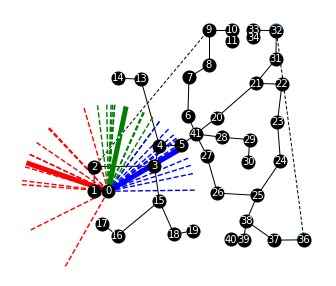

In [11]:
# Additional plot of all measurements for a specific object pair
import scipy.stats

ax = plt.subplot(111, aspect='equal')

# nx.draw(Gw, with_labels=True, node_size=150, pos=gt,
#         node_color='k', font_size=8, font_color='w')
# ax.set_title("Bookcase-cactus estimates")

ax.add_patch(plt.Circle(gt[32], 0.5))
ax.add_patch(plt.Circle(gt[36], 0.5))

plt.axis('off')

avg = []
for s in range(data.shape[0]):
    m = dataPerSubject(data, headers, s)[0]
    avg.append(m[2])
    plt.plot([gt[m[0]][0], gt[m[0]][0]+6*np.cos(m[2])],
             [gt[m[0]][1], gt[m[0]][1]+6*np.sin(m[2])],
             color='g', linestyle='--', linewidth=1.4, solid_capstyle='butt')
average = scipy.stats.circmean(avg, np.pi, -np.pi)
plt.plot([gt[m[0]][0], gt[m[0]][0]+6*np.cos(average)],
         [gt[m[0]][1], gt[m[0]][1]+6*np.sin(average)],
         color='g', linewidth=5, solid_capstyle='butt')

avg = []
for s in range(data.shape[0]):
    m = dataPerSubject(data, headers, s)[1]
    avg.append(m[2])
    plt.plot([gt[m[0]][0], gt[m[0]][0]+6*np.cos(m[2])],
             [gt[m[0]][1], gt[m[0]][1]+6*np.sin(m[2])],
             color='b', linestyle='--', linewidth=1.4, solid_capstyle='butt')
average = scipy.stats.circmean(avg, np.pi, -np.pi)
plt.plot([gt[m[0]][0], gt[m[0]][0]+6*np.cos(average)],
         [gt[m[0]][1], gt[m[0]][1]+6*np.sin(average)],
         color='b', linewidth=5, solid_capstyle='butt')

avg = []
for s in range(data.shape[0]):
    m = dataPerSubject(data, headers, s)[2]
    avg.append(m[2])
    plt.plot([gt[m[0]][0], gt[m[0]][0]+6*np.cos(m[2])],
             [gt[m[0]][1], gt[m[0]][1]+6*np.sin(m[2])],
             color='r', linestyle='--', linewidth=1.4, solid_capstyle='butt')
average = scipy.stats.circmean(avg, np.pi, -np.pi)
plt.plot([gt[m[0]][0], gt[m[0]][0]+6*np.cos(average)],
         [gt[m[0]][1], gt[m[0]][1]+6*np.sin(average)],
         color='r', linewidth=5, solid_capstyle='butt')

# plt.savefig("plots/ripsandfolds_bookcase.png", dpi=300, bbox_inches='tight')

# plt.show()

ax = plt.subplot(111, aspect='equal')
plt.plot([gt[2][0], gt[9][0]], [gt[2][1], gt[9][1]], color='w',
         linestyle=':', linewidth=2, solid_capstyle='butt')
plt.plot([gt[32][0], gt[36][0]], [gt[32][1],
         gt[36][1]], color='w', linestyle=':', linewidth=2, solid_capstyle='butt')
nx.draw(Gw, with_labels=True, node_size=170,
        pos=gt, node_color='k', font_color='w', font_size=10)

# plt.savefig("plots/graph_gt3.png", dpi=300, bbox_inches='tight', transparent=True)

plt.show()


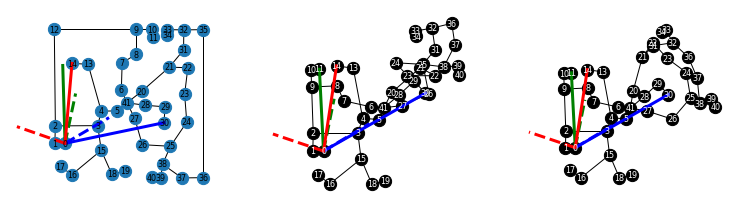

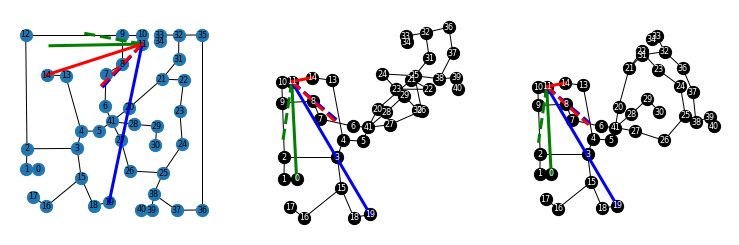

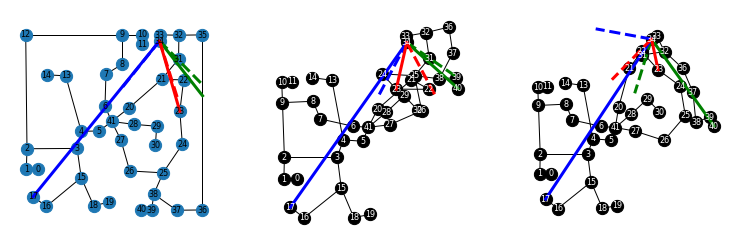

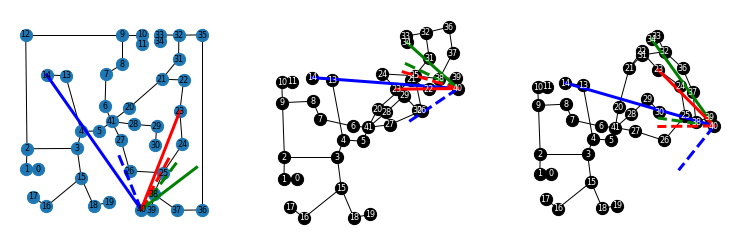

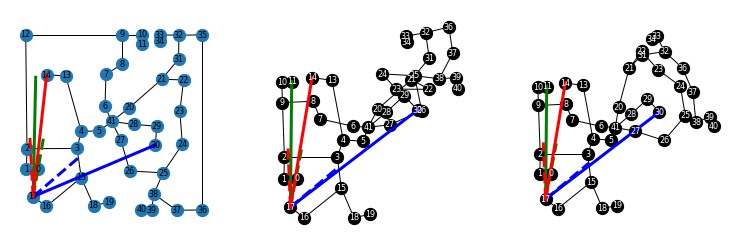

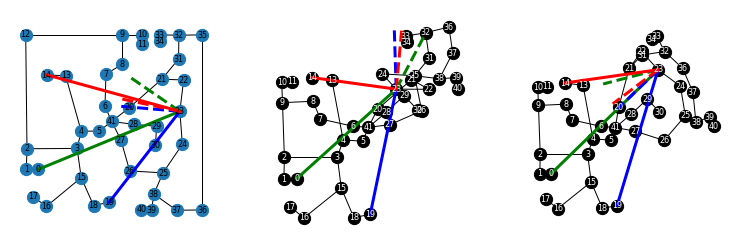

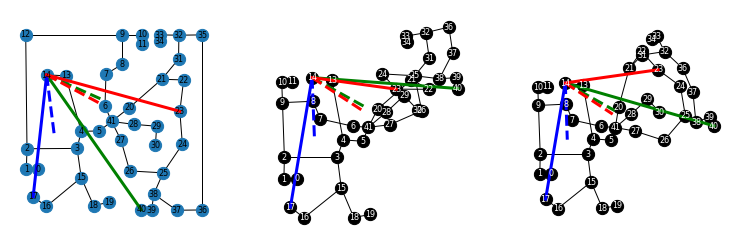

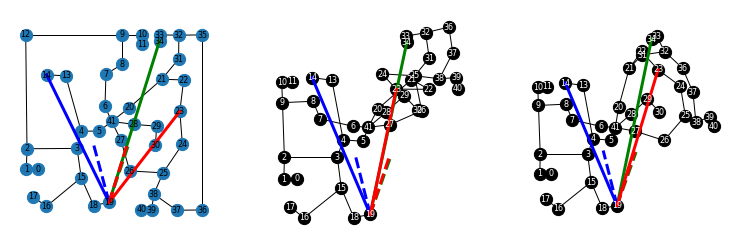

In [12]:
# Plot examples (circular mean of all subjects)
import scipy.stats

data_cmean = np.rad2deg(np.expand_dims(scipy.stats.circmean(
    np.deg2rad(np.asarray(data)), np.pi, -np.pi, axis=0), axis=0))

data_sub = dataPerSubject(data_cmean, headers, 0)
est_local1 = fr4.makeLocal(Gw, gt, em1, data_sub)
est_local2 = fr4.makeLocal(Gw, gt, em2, data_sub)

for i in range(8):
    ax = plt.subplot(131, aspect='equal')
    nx.draw(Gn, with_labels=True, node_size=150, pos=gt, font_size=8)
    plotRip(data_sub, gt, i*3)

    ax = plt.subplot(132, aspect='equal')
    nx.draw(Gw, with_labels=True, node_size=150, pos=em1,
            node_color='k', font_size=8, font_color='w')
    fr4.plotLineAndMeasurement(est_local1[i*3], em1, 'g', 3)
    fr4.plotLineAndMeasurement(est_local1[i*3+1], em1, 'b', 3)
    fr4.plotLineAndMeasurement(est_local1[i*3+2], em1, 'r', 3)

    ax = plt.subplot(133, aspect='equal')
    nx.draw(Gw, with_labels=True, node_size=150, pos=em2,
            node_color='k', font_size=8, font_color='w')
    fr4.plotLineAndMeasurement(est_local2[i*3], em2, 'g', 3)
    fr4.plotLineAndMeasurement(est_local2[i*3+1], em2, 'b', 3)
    fr4.plotLineAndMeasurement(est_local2[i*3+2], em2, 'r', 3)

    plt.show()


Interestingly, embedding 2 seems to fit the data somewhat better (particularly in plot 5) but statistical test are required to confirm this. Also, the circular mean removes information about error distribution.

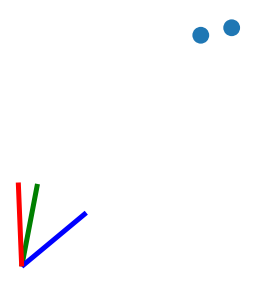

In [13]:
#  ==== additional plots

ax = plt.subplot(121, aspect='equal')
plt.axis('off')
colors = ['g', 'b', 'r']

for i in range(3):
        d = est_local1[12+i]
        # v = fr4.vectorAlongPath(nx.dijkstra_path(Gw, d[0], d[1]), em1,  D, A)
        # fr4.plotVectorAndMeasurement(v, d, em1, 'b', 1)
        plt.plot([em1[d[0]][0], em1[d[0]][0]+5*np.cos(d[2])],
                [em1[d[0]][1], em1[d[0]][1]+5*np.sin(d[2])],
                color=colors[i], linewidth=5, solid_capstyle='butt')
        
ax.add_patch(plt.Circle(em1[32], 0.5))
ax.add_patch(plt.Circle(em1[36], 0.5))

# plt.savefig("plots/rnf_avg_em1.png", dpi=300,
#             bbox_inches='tight', transparent=True)

plt.show()



<br />

### 5. Rips and folds - results

Results, overall average:
Avg. unit vector distance error: va: 0.4505 | em1: 0.7585 | em2: 0.5964
Avg. angular error: va: 5.6838° | em1: 2.3749° | em2: -15.7320°
Avg. absolute angular error: va: 8.2242° | em1: 7.6304° | em2: 15.7320°
Overall angular deviation VA:8.1192°, em1:9.3494°, em2:8.3800°


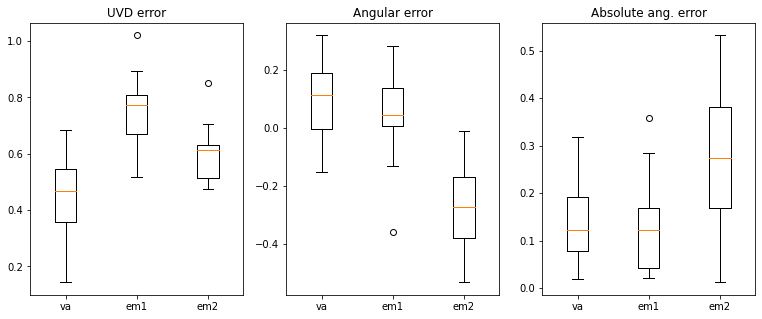

In [14]:
# Loading and formatting of the datasets generated by the "Rips and folds" experiment

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 5]

dataset_ue = np.loadtxt("datasets/dataset_RnF_ue3.txt", delimiter="\t", dtype=float)
dataset_ae = np.loadtxt("datasets/dataset_RnF_ae3.txt", delimiter="\t", dtype=float)

# Option: Remove the gear measurement (15ff, 39ff, 63ff)
# dataset_ue = np.delete(dataset_ue,np.s_[15,16,17, 39,40,41, 63,64,65],1)
# dataset_ae = np.delete(dataset_ae,np.s_[15,16,17, 39,40,41, 63,64,65],1)

# all samples
# ue_va = dataset_ue[:, :24].flatten()
# ue_em1 = dataset_ue[:, 24:48].flatten()
# ue_em2 = dataset_ue[:, 48:].flatten()

# ae_va = dataset_ae[:, :24].flatten()
# ae_em1 = dataset_ae[:, 24:48].flatten()
# ae_em2 = dataset_ae[:, 48:].flatten()

# Option: as in Warren 2017: Avg. over all measurements
ue_va = np.mean(dataset_ue[:, :24], axis=1)
ue_em1 = np.mean(dataset_ue[:, 24:48], axis=1)
ue_em2 = np.mean(dataset_ue[:, 48:], axis=1)

ae_va = scipy.stats.circmean(dataset_ae[:, :24], np.pi, -np.pi, axis=1)
ae_em1 = scipy.stats.circmean(dataset_ae[:, 24:48], np.pi, -np.pi, axis=1)
ae_em2 = scipy.stats.circmean(dataset_ae[:, 48:], np.pi, -np.pi, axis=1)


print("Results, overall average:")

print("Avg. unit vector distance error: va: {:.4f} | em1: {:.4f} | em2: {:.4f}".format(
    np.mean((ue_va)), np.mean((ue_em1)),np.mean((ue_em2))))

print("Avg. angular error: va: {:.4f}° | em1: {:.4f}° | em2: {:.4f}°".format(
    np.rad2deg(scipy.stats.circmean((ae_va), np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circmean((ae_em1), np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circmean((ae_em2), np.pi, -np.pi))))

print("Avg. absolute angular error: va: {:.4f}° | em1: {:.4f}° | em2: {:.4f}°".format(
    np.rad2deg(scipy.stats.circmean(np.abs((ae_va)), np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circmean(np.abs((ae_em1)), np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circmean(np.abs((ae_em2)), np.pi, -np.pi))))

print("Overall angular deviation VA:{:.4f}°, em1:{:.4f}°, em2:{:.4f}°".format(
    np.rad2deg(scipy.stats.circstd(ae_va, np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circstd(ae_em1, np.pi, -np.pi)),
    np.rad2deg(scipy.stats.circstd(ae_em2, np.pi, -np.pi))))

# Boxplot of the results
ax = plt.subplot(131)
ax.boxplot([ue_va, ue_em1, ue_em2])
ax.set_xticklabels(["va", "em1", "em2"])
ax.set_title("UVD error")

ax = plt.subplot(132)
ax.boxplot([ae_va, ae_em1, ae_em2])
ax.set_xticklabels(["va", "em1", "em2"])
ax.set_title("Angular error")

ax = plt.subplot(133)
ax.boxplot([np.abs(ae_va), np.abs(ae_em1), np.abs(ae_em2)])
ax.set_xticklabels(["va", "em1", "em2"])
ax.set_title("Absolute ang. error")
plt.show()


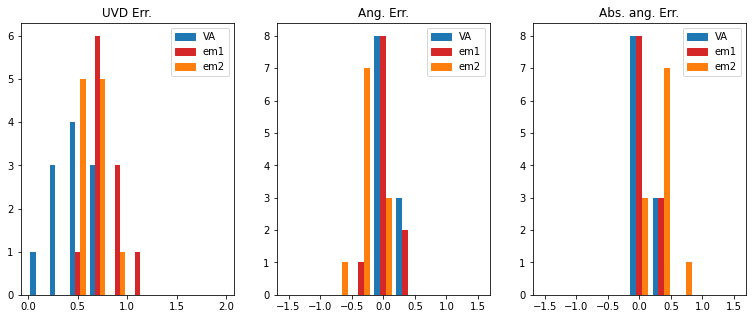

In [15]:
# Histogram plots
import matplotlib.patches

colors = ["tab:blue", "tab:red", "tab:orange"]
lva = matplotlib.patches.Patch(color=colors[0], label="VA")
lem1 = matplotlib.patches.Patch(color=colors[1], label="em1")
lem2 = matplotlib.patches.Patch(color=colors[2], label="em2")

ax = plt.subplot(131)
ax.hist([ue_va, ue_em1, ue_em2], 10, (0, 2), color=colors)
ax.legend(handles=[lva, lem1, lem2])
ax.set_title("UVD Err.")

ax = plt.subplot(132)
ax.hist([ae_va, ae_em1, ae_em2], 9, (-np.pi/2, np.pi/2), color=colors)
ax.legend(handles=[lva, lem1, lem2])
ax.set_title("Ang. Err.")

ax = plt.subplot(133)
ax.hist([np.abs(ae_va), np.abs(ae_em1), np.abs(ae_em2)],
        9, (-np.pi/2, np.pi/2), color=colors)
ax.legend(handles=[lva, lem1, lem2])
ax.set_title("Abs. ang. Err.")


plt.show()


In [16]:
# Unit vector distance error

print("UVD error em1:")
print(scipy.stats.ttest_ind(ue_va, ue_em1, equal_var=False))
print(scipy.stats.mannwhitneyu(ue_va, ue_em1))
print(scipy.stats.kstest(ue_va, ue_em1))
print("Cohen's d: {}".format(np.abs((np.mean(ue_va) - np.mean(ue_em1))
                                    / np.sqrt(np.var(ue_va) + np.var(ue_em1)))))

print("\nUVD error em2:")
print(scipy.stats.ttest_ind(ue_va, ue_em2, equal_var=False))
print(scipy.stats.mannwhitneyu(ue_va, ue_em2))
print(scipy.stats.kstest(ue_va, ue_em2))
print("Cohen's d: {}".format(np.abs((np.mean(ue_va) - np.mean(ue_em2))
                                    / np.sqrt(np.var(ue_va) + np.var(ue_em2)))))


UVD error em1:
Ttest_indResult(statistic=-4.881660425159772, pvalue=9.897158807326687e-05)
MannwhitneyuResult(statistic=6.0, pvalue=0.00039125894667119756)
KstestResult(statistic=0.8181818181818182, pvalue=0.0006549178375803762)
Cohen's d: 1.5437165707010823

UVD error em2:
Ttest_indResult(statistic=-2.4578403179246835, pvalue=0.02438850418242826)
MannwhitneyuResult(statistic=25.0, pvalue=0.021546120951385805)
KstestResult(statistic=0.6363636363636364, pvalue=0.020739064856711915)
Cohen's d: 0.7772373529634373


In [17]:
# Angular error
import pycircstat
import function_repository4 as fr4

print("Rayleigh tests:")
rl_p, rl_z = pycircstat.tests.rayleigh(ae_va,)
print("VA:Rayleigh-test for uniform distribution: p={}, z(11)={}".format(rl_p, rl_z))
rl_p, rl_z = pycircstat.tests.rayleigh(ae_em1,)
print("Em1:Rayleigh-test for uniform distribution: p={}, z(11)={}".format(rl_p, rl_z))
rl_p, rl_z = pycircstat.tests.rayleigh(ae_em2,)
print("Em2:Rayleigh-test for uniform distribution: p={}, z(11)={}".format(rl_p, rl_z))

print("\nAng. error em1:")
ww_p, ww_f = pycircstat.tests.watson_williams(ae_va, ae_em1)
print("VA-Em1: Wattson-Williams result: p={}".format(ww_p))
print(scipy.stats.ttest_ind(ae_va, ae_em1, equal_var=False))
print(scipy.stats.mannwhitneyu(ae_va, ae_em1))
print(scipy.stats.kstest(ae_va, ae_em1))
print("Cohen's d (VA-em1): {}, Circular: {}".format(fr4.cohens_d(ae_va, ae_em1), 
    fr4.cohens_d(ae_va, ae_em1, circular=True)))

ww_f


Rayleigh tests:
VA:Rayleigh-test for uniform distribution: p=1.6632561591060236e-07, z(11)=10.781314225120388
Em1:Rayleigh-test for uniform distribution: p=2.0447821398892117e-07, z(11)=10.710968614054119
Em2:Rayleigh-test for uniform distribution: p=1.7344547442481971e-07, z(11)=10.767193073329118

Ang. error em1:
VA-Em1: Wattson-Williams result: p=0.40744342560377034
Ttest_indResult(statistic=0.8553031573033893, pvalue=0.40271524983033014)
MannwhitneyuResult(statistic=68.0, pvalue=0.6457638203049723)
KstestResult(statistic=0.18181818181818182, pvalue=0.9970968144342757)
Cohen's d (VA-em1): 0.36470249167659585, Circular: 0.3888807845431371


,df,SS,MS,F,p-value
Source,,,,,
Columns,1.0,0.009065,0.009065,0.716082,0.407443
Residual,20.0,0.255369,0.012768,NaN,NaN
Total,21.0,0.264434,NaN,NaN,NaN


In [18]:
# angular error statistical testing for em2

print("\nAng. error em2:")
ww_p, ww_f = pycircstat.tests.watson_williams(ae_va, ae_em2)
print("VA-Em2: Wattson-Williams result: p={}".format(ww_p))
print(scipy.stats.ttest_ind(ae_va, ae_em2, equal_var=False))
print(scipy.stats.mannwhitneyu(ae_va, ae_em2))
print(scipy.stats.kstest(ae_va, ae_em2))
print("Cohen's d (VA-em2): {}, Circular: {}".format(fr4.cohens_d(ae_va, ae_em2), 
    fr4.cohens_d(ae_va, ae_em2, circular=True)))



Ang. error em2:
VA-Em2: Wattson-Williams result: p=1.1192065579260135e-05
Ttest_indResult(statistic=5.807877182990372, pvalue=1.1110974536698529e-05)
MannwhitneyuResult(statistic=116.0, pvalue=0.00030434234335938127)
KstestResult(statistic=0.8181818181818182, pvalue=0.0006549178375803762)
Cohen's d (VA-em2): 2.4764871518379032, Circular: 2.5168877328232004


In [19]:
# Absolute angular error

print("Ang. error em1:")
ww_p, ww_f = pycircstat.tests.watson_williams(np.abs(ae_va), np.abs(ae_em1))
print("VA-Em1: Wattson-Williams result: p={}".format(ww_p))
print(scipy.stats.ttest_ind(np.abs(ae_va), np.abs(ae_em1), equal_var=False))
print(scipy.stats.mannwhitneyu(np.abs(ae_va), np.abs(ae_em1)))
print(scipy.stats.kstest(np.abs(ae_va), np.abs(ae_em1)))
print("Cohen's d (VA-em1): {}, Circular: {}".format(fr4.cohens_d(np.abs(ae_va), 
    np.abs(ae_em1)), fr4.cohens_d(np.abs(ae_va), np.abs(ae_em1), circular=True)))

print("\nAng. error em2:")
ww_p, ww_f = pycircstat.tests.watson_williams(np.abs(ae_va), np.abs(ae_em2))
print("VA-Em2: Wattson-Williams result: p={}".format(ww_p))
print(scipy.stats.ttest_ind(np.abs(ae_va), np.abs(ae_em2), equal_var=False))
print(scipy.stats.mannwhitneyu(np.abs(ae_va), np.abs(ae_em2)))
print(scipy.stats.kstest(np.abs(ae_va), np.abs(ae_em2)))
print("Cohen's d (VA-em2): {}, Circular: {}".format(fr4.cohens_d(np.abs(ae_va), 
    np.abs(ae_em2)), fr4.cohens_d(np.abs(ae_va), np.abs(ae_em2), circular=True)))



Ang. error em1:
VA-Em1: Wattson-Williams result: p=0.8181743411104848
Ttest_indResult(statistic=0.23092569658290807, pvalue=0.8197284449276143)
MannwhitneyuResult(statistic=62.0, pvalue=0.9476445296225945)
KstestResult(statistic=0.18181818181818182, pvalue=0.9970968144342757)
Cohen's d (VA-em1): 0.09846704787278868, Circular: 0.10270743655436064

Ang. error em2:
VA-Em2: Wattson-Williams result: p=0.028005491144050255
Ttest_indResult(statistic=-2.366628351729731, pvalue=0.02986366997177551)
MannwhitneyuResult(statistic=31.0, pvalue=0.056873036034794405)
KstestResult(statistic=0.45454545454545453, pvalue=0.21147608841107293)
Cohen's d (VA-em2): -1.0091337198725525, Circular: -1.2985329604303624


#### 5.1 Discussion

Differences between the models are mainly due to the "Gear" measurement triplet and the north-south reversal of the related nodes in embedding 1. The reversal likely strongly depends on the chosen number of nodes. Still, the difference is not significant.

(Cont.)

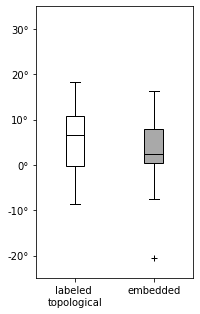

In [20]:
# Additional figures: Prediction Error
import matplotlib.ticker

ax = plt.subplot(141)
bplot = ax.boxplot([np.rad2deg(ae_va), np.rad2deg(ae_em1)],
                   widths=0.24, patch_artist=True, flierprops={'marker': '+'})
ax.set_xticklabels(["labeled \ntopological", "embedded"])
ax.set_ylim([-25, 35])
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d°'))
# ax.set_title("Prediction error")

colors = ['white', 'darkgray']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

colors = ['black', 'white']
for median, color in zip(bplot['medians'], colors):
    median.set_color("black")

# plt.savefig("plots/results_rnf_boxplot.png", dpi=300,
#             bbox_inches='tight', transparent=True)

plt.show()


Text(0.5, 1.0, 'Prediction error')

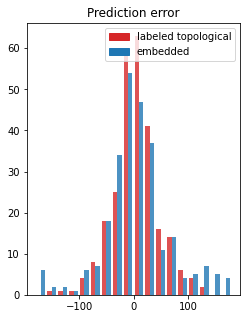

In [21]:
# Additional histogram plots
import matplotlib.patches

data_bplot_va = np.rad2deg(dataset_ae[:, :24].flatten())
data_bplot_em1 = np.rad2deg(dataset_ae[:, 24:48].flatten())
# data_bplot_va = np.rad2deg(ae_va.flatten())
# data_bplot_em1 = np.rad2deg(ae_em1.flatten())

colors = ["tab:red", "tab:blue"]
lva = matplotlib.patches.Patch(color=colors[0], label="labeled topological")
lem1 = matplotlib.patches.Patch(color=colors[1], label="embedded")

ax = plt.subplot(132)
ax.hist([data_bplot_va, data_bplot_em1], 18, (-180, 180), color=colors, alpha=0.8)
# ax.hist(data_bplot_va, 24, (-180, 180), color=colors[0], alpha=0.5)
# ax.hist(data_bplot_em1, 24, (-180, 180), color=colors[1], alpha=0.5)
ax.legend(handles=[lva, lem1])
ax.set_title("Prediction error")
